In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [166]:
# Загрузка датафрейма
from sklearn.datasets import load_boston
house_data = load_boston()
# print(house_data["DESCR"])

x = pd.DataFrame(house_data["data"], columns=house_data["feature_names"])
y = house_data["target"]

x.describe()

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

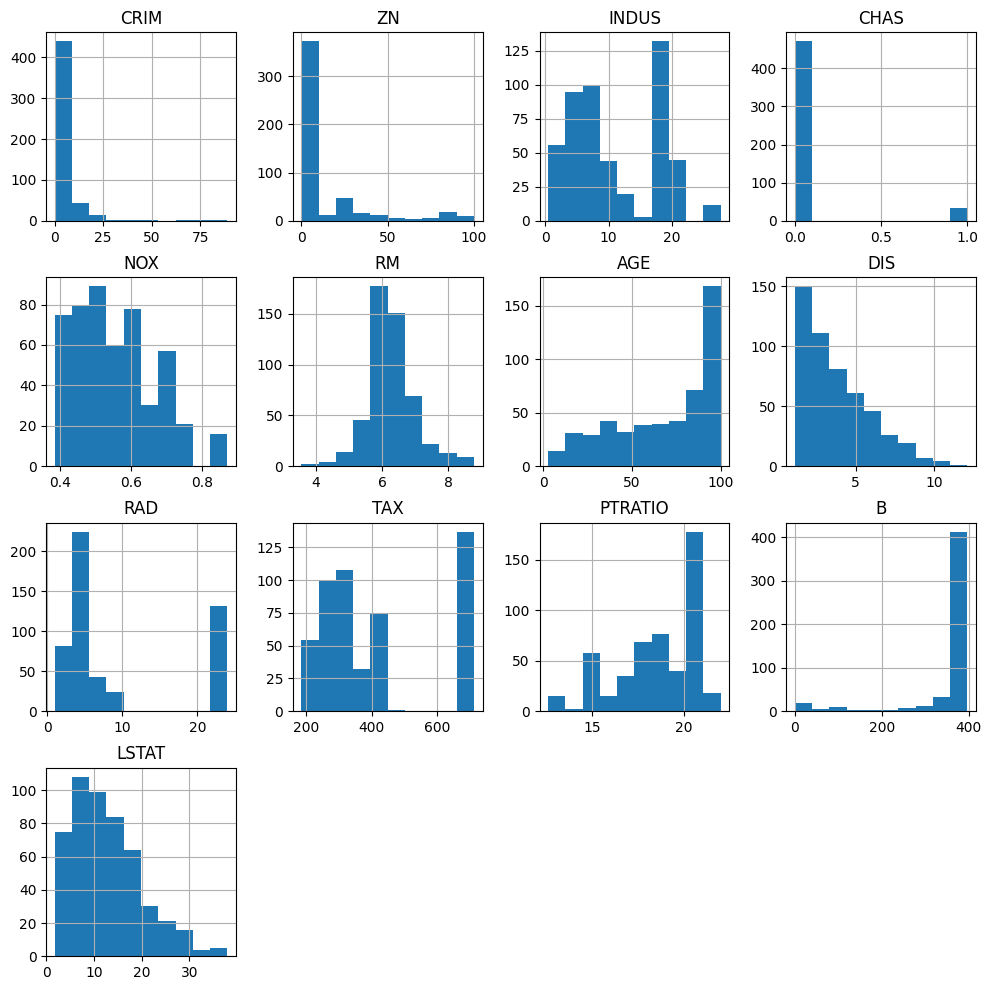

In [167]:
# Визуализация признаков
x.hist(x.columns, figsize=(12,12))


<AxesSubplot: >

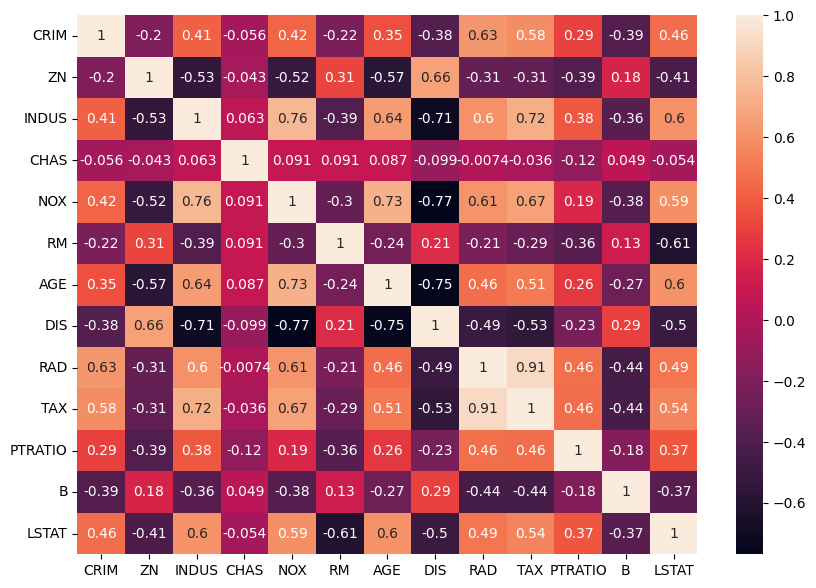

In [168]:
# Смотрим карту корреляции параметров, сильно коррелируемые данные надо исключать
import seaborn
plt.figure(figsize=(10,7))
seaborn.heatmap(x.corr(), annot=True)

In [169]:
# Разбиваем данные на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [170]:
# Нормализируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(np.concatenate((x_train , x_test)))
scaler.fit(x.values)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


((354, 13), (152, 13), (354,), (152,))

In [171]:
# Обучаем модель, формируем предикты по Линейной регрессии
# Предсказывается цена
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

<BarContainer object of 13 artists>

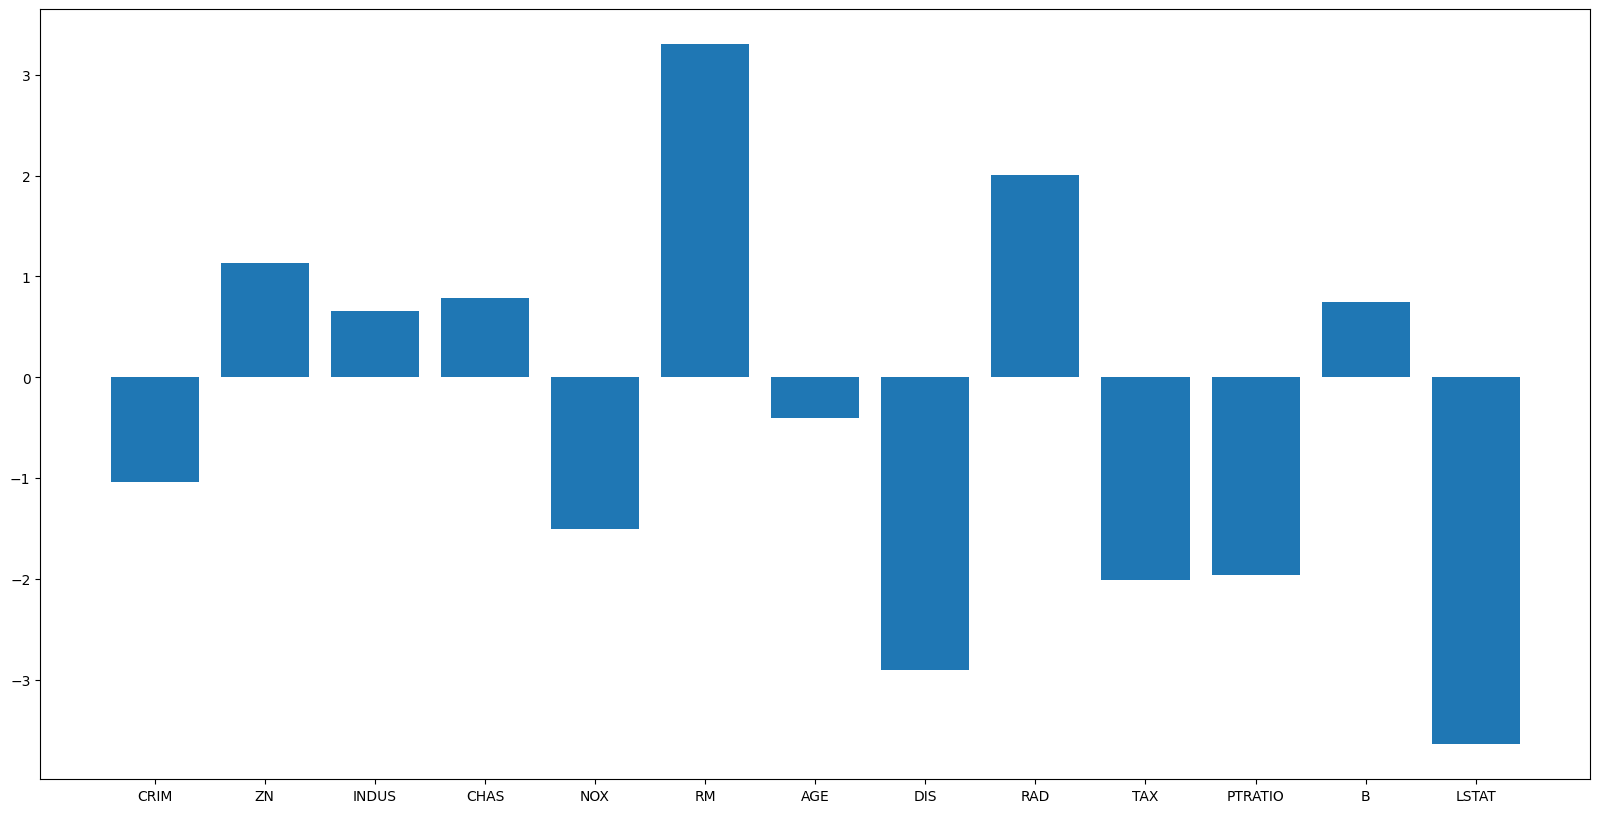

In [172]:
# Визуализируем весов Линейной регрессии через график
plt.figure(figsize=(20,10))
plt.bar(x.columns, model.coef_)

In [173]:
# Выводим веса Линейной регрессии через pandas
# https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
pd.DataFrame(model.coef_, x.columns, columns=["coef"]).sort_values(by="coef", ascending=False)
# Интерпритация весов линейной регрессии: «При каждом увеличении [переменной X]
# на одну единицу [переменная y] увеличивается на [коэффициент], когда все
# остальные переменные остаются постоянными».

,coef
RM,3.301751
RAD,2.007632
ZN,1.129039
CHAS,0.782667
B,0.741874
INDUS,0.658707
AGE,-0.402643
CRIM,-1.037166
NOX,-1.504465
PTRATIO,-1.963519


In [174]:
# Оценка весов для Логистической регрессии (классификация)
# https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
# Классификация цен определяется как меньше больше мединаы
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
y_median = np.median(y_train)
y_train_log = (y_train > y_median).astype(float)
y_test_log = (y_test > y_median).astype(float)
model_log.fit(x_train, y_train_log)

# Интерпритация весов логистической регрессии: «Для каждого увеличения
# [переменной X] на одну единицу вероятность того, что наблюдение относится
# к (классу y), в [коэффициент] раз больше, чем вероятность того, что
# наблюдение не относится к (классу y), когда все остальные переменные
# удерживаются. постоянный». !Обязательно надо веса перевести через np.exp()

y_log_predict_train = model_log.predict(x_train)
y_log_predict_test = model_log.predict(x_test)


# Для интерпретации весов в логистической регрессии, веса необходимо
# преобразовать через возведения числа "e" в степень веса
model_weights = np.exp(model_log.coef_[0])
pd.DataFrame(model_weights, x.columns, columns=["coef"]).sort_values(by="coef", ascending=False)
# Итоговые значения меньше единицы говорят об обратном влиянии параметров.
# Для верной интерпретации необходмио веса меньше 1 читать как 1/вес, что
# влияет на вероятность в 1/вес непопадания в интересующий класс при
# увеличении значения парамтера на 1.

,coef
RAD,4.113256
RM,3.473596
CHAS,1.510471
ZN,1.423126
B,1.380477
INDUS,1.090203
NOX,0.720139
CRIM,0.476840
AGE,0.434368
PTRATIO,0.383554


In [175]:
y_log_predict_train
# y_log_predict_train.astype(float)

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0.

In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Metrics for LinearRegression: ")
print(f"\ttrain: Mean Absolute Error: {mean_absolute_error(y_train, y_predict_train)}")
print(f"\ttest: Mean Absolute Error: {mean_absolute_error(y_test, y_predict_test)}")
print(f"\ttrain: Mean Squared Error: {mean_squared_error(y_train, y_predict_train)}")
print(f"\ttest: Mean Squared Error: {mean_squared_error(y_test, y_predict_test)}")


print("Metrics for LogisticRegression: ")
print(f"\ttrain: Mean Absolute Error: {mean_absolute_error(y_train_log, y_log_predict_train)}")
print(f"\ttest: Mean Absolute Error: {mean_absolute_error(y_test_log, y_log_predict_test)}")
print(f"\ttrain: Mean Squared Error: {mean_squared_error(y_train_log, y_log_predict_train)}")
print(f"\ttest: Mean Squared Error: {mean_squared_error(y_test_log, y_log_predict_test)}")

Metrics for LinearRegression: 
	train: Mean Absolute Error: 3.059242431076499
	test: Mean Absolute Error: 3.7340929427360527
	train: Mean Squared Error: 19.48058805430767
	test: Mean Squared Error: 29.543005566465915
Metrics for LogisticRegression: 
	train: Mean Absolute Error: 0.11864406779661017
	test: Mean Absolute Error: 0.09868421052631579
	train: Mean Squared Error: 0.11864406779661017
	test: Mean Squared Error: 0.09868421052631579


In [178]:
# Кросс-валидация
from sklearn.model_selection import cross_val_score
result = cross_val_score(estimator=LinearRegression(), X=x, y=y, scoring="neg_mean_absolute_error", cv=5)
result

array([-2.62190565, -3.90725478, -4.386606  , -5.57073637, -4.76333993])

In [202]:
normailze_x = scaler.transform(x.values)
result = cross_val_score(estimator=LinearRegression(), X=normailze_x, y=y, scoring="neg_mean_absolute_error", cv=5)
result
print(f"Среднее MeanAbsoluteError: {abs(np.mean(result))}, стандартное отколнение MAE: {np.std(result)}")

Среднее MeanAbsoluteError: 4.249968544192518, стандартное отколнение MAE: 0.9792537069067632
